# New TDM client demo

### Download and filter metadata with Pandas

In [1]:
# Parameters:
dataset_id = "674bc524-aeae-f683-7b83-433dec676b5b"

In [2]:
# Importing your dataset with a dataset ID
from tdm_package import tdm_client

dataset_metadata = tdm_client.get_metadata(dataset_id)

INFO:root:Downloading 674bc524-aeae-f683-7b83-433dec676b5b metadata to 674bc524-aeae-f683-7b83-433dec676b5b.csv


100% |########################################################################|


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(dataset_metadata)

In [ ]:
print('Total documents', len(df))

In [ ]:
dataset_document_count = len(df)
print("Total documents", dataset_document_count)

In [12]:
# Set the pandas option to show all columns
pd.set_option("max_columns", None) 

df.head() # Show the first five rows of our DataFrame

,id,title,isPartOf,publicationYear,doi,docType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
0,ark://27927/phw84265n1,Verdi at 200: Recent Scholarship on the Compos...,Notes,2013,NaN,article,portico,2013-08-19,1,70,NaN,Linda Beard. Fairtile,Project MUSE,eng,9,36,NaN,17640,28.0,unigram
1,ark://27927/phx2dpmm7m4,Issue Level Content,Music Perception,2016,NaN,article,portico,2016-04-01,4,33,NaN,NaN,University of California Press,eng,NaN,NaN,NaN,356,1.0,unigram
2,http://www.jstor.org/stable/j.ctt180r0s2.17,The Other Semiotic Legacy of Charles Sanders P...,"Music, Analysis, Experience",2015,NaN,chapter,jstor,2015-01-01,NaN,NaN,http://www.jstor.org/stable/j.ctt180r0s2.17,NaN,NaN,eng,185,208,NaN,9545,24.0,unigram; bigram; trigram
3,ark://27927/phz31k8js1t,Faces of Tradition in Chinese Performing Arts,Journal of Folklore Research,2018,NaN,article,portico,2018-03-16,1,55,NaN,Levi S. Gibbs,Project MUSE,eng,1,19,NaN,9564,19.0,unigram
4,http://www.jstor.org/stable/10.1525/jams.2013....,Review Article,Journal of the American Musicological Society,2013,NaN,article,jstor,2013-04-01,1,66,http://www.jstor.org/stable/10.1525/jams.2013....,Elizabeth Aubrey,University of California Press,eng,297,304,NaN,3957,8.0,unigram; bigram; trigram


In [13]:
id_list = df['id'].tolist()

In [ ]:
'http://www.jstor.org/stable/2871420' in id_list

In [14]:
id_list

['ark://27927/phw84265n1',
 'ark://27927/phx2dpmm7m4',
 'http://www.jstor.org/stable/j.ctt180r0s2.17',
 'ark://27927/phz31k8js1t',
 'http://www.jstor.org/stable/10.1525/jams.2013.66.1.297',
 'http://www.jstor.org/stable/10.5406/j.ctt2ttcbd.15',
 'http://www.jstor.org/stable/41412672',
 'http://www.jstor.org/stable/41203374',
 'http://www.jstor.org/stable/10.7722/j.ctt19x3hh6.14',
 'http://www.jstor.org/stable/26414193',
 'http://www.jstor.org/stable/j.ctt9qds9m.26',
 'http://www.jstor.org/stable/j.ctvc771s4.5',
 'http://www.jstor.org/stable/23319456',
 'http://www.jstor.org/stable/40963058',
 'ark://27927/phz9dp74znk',
 'ark://27927/phwqnx4pwh',
 'http://www.jstor.org/stable/10.1525/jams.2015.68.1.151',
 'ark://27927/pbd87whj60',
 'http://www.jstor.org/stable/10.7722/j.ctt81w8d.16',
 'http://www.jstor.org/stable/j.ctt2250v32.21',
 'ark://27927/phz2cfcn8dq',
 'http://www.jstor.org/stable/24389531',
 'ark://27927/pgg1bjshr60',
 'http://www.jstor.org/stable/10.1525/jams.2010.63.2.402',
 '

In [15]:
# Drop each of these named columns
df = df.drop(['outputFormat', 'pageEnd', 'pageStart', 'datePublished', 'language'], axis=1)

In [16]:
# Drop articles without an author
df = df.dropna(subset=['creator'])

In [17]:
print("Original total", dataset_document_count)
print("Filtered total", len(df))

NameError: name 'dataset_document_count' is not defined

In [18]:
# Examples for filtering the data based on the values found under 'title'

df = df[df.title != 'Review Article'] # Remove articles with title "Review Article"
df = df[df.title != 'Front Matter'] # Remove articles with title "Front Matter"
df = df[df.title != 'Back Matter'] # Remove articles with title "Back Matter"

# Remove articles with fewer than 3000 words, adjust or remove

df = df[df.wordCount > 3000] 

In [19]:
print("Original total", dataset_document_count)
print("Filtered total", len(df))

NameError: name 'dataset_document_count' is not defined

In [20]:
filtered_id_list = df["id"].tolist()

In [ ]:
df.groupby(['publicationYear'])['id'].agg('count').plot.bar(title='Documents by year', figsize=(20, 5), fontsize=12); 

In [ ]:
df.groupby(['publicationYear'])['pageCount'].agg('sum').plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12);

### Count word frequencies

In [6]:
dataset_json_file = tdm_client.get_dataset(dataset_id)

INFO:root:Downloading 674bc524-aeae-f683-7b83-433dec676b5b to 674bc524-aeae-f683-7b83-433dec676b5b.jsonl.gz


100% |########################################################################|


In [ ]:
import json
import gzip
from collections import Counter

word_frequency = Counter()

In [ ]:
with gzip.open(dataset_json_file, "rb") as input_file:
    for row in input_file:
        document = json.loads(row)
        _id = document["id"]
        if _id in filtered_id_list:
            unigrams = document.get("unigramCount", [])
            for gram, count in unigrams.items():
                word_frequency[gram] += count

In [ ]:
word_frequency

In [ ]:
for gram, count in word_frequency.most_common(25):
    print(gram.ljust(20), count)

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
transformed_word_frequency = Counter()

In [ ]:
for document in tdm_client.dataset_reader(dataset_json_file):
    _id = document["id"]
    if _id in filtered_id_list:
        unigrams = document.get("unigramCount", [])
        for gram, count in unigrams.items():
            clean_gram = gram.lower()
            if clean_gram in stop_words:
                continue
            transformed_word_frequency[clean_gram] += count
        break

In [ ]:
transformed_word_frequency

In [ ]:
for gram, count in transformed_word_frequency.most_common(25):
    print(gram.ljust(20), count)

In [ ]:
df = pd.DataFrame(list(transformed_word_frequency.items())[:25], columns=["ngram", "count"])

In [ ]:
df.head()

In [ ]:
df.sort_values('count', ascending=True).plot.barh(title='Frequent words', figsize=(20, 10), fontsize=12, x="ngram", y="count");

### Significant terms

Run TFIDF on the first 10 documents in the filtered corpus.

In [7]:
def process_token(token):
    token = token.lower()
    if token in stop_words:
        return
    if len(token) < 4:
        return
    if not(token.isalpha()):
        return
    return token

In [8]:
import gensim

In [23]:
# Limit to n documents. Set to None to do all

limit = 500

n = 0
documents = []
for document in tdm_client.dataset_reader(dataset_json_file):
    processed_document = []
    _id = document["id"]
    if _id in filtered_id_list:
        unigrams = document.get("unigramCount", [])
        for gram, count in unigrams.items():
            clean_gram = process_token(gram)
            if clean_gram is None:
                continue
            processed_document.append(clean_gram)
        if len(processed_document) > 0:
            documents.append(processed_document)
        n += 1
        if (limit is not None) and (n >= limit):
           break

In [24]:
dictionary = gensim.corpora.Dictionary(documents)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(133058 unique tokens: ['aaron', 'absolute', 'academy', 'account', 'adams']...) from 500 documents (total 992408 corpus positions)


In [25]:
dict(list(dictionary.token2id.items())[0:10]) # Print the first ten tokens and their associated IDs.


{'aaron': 0,
 'absolute': 1,
 'academy': 2,
 'account': 3,
 'adams': 4,
 'adapted': 5,
 'adrian': 6,
 'aesthetic': 7,
 'ages': 8,
 'aidan': 9}

In [26]:
bow_corpus = [dictionary.doc2bow(doc) for doc in documents]

In [27]:
model = gensim.models.TfidfModel(bow_corpus)

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:calculating IDF weights for 500 documents and 133058 features (938642 matrix non-zeros)


In [28]:
corpus_tfidf = model[bow_corpus]

In [29]:
rows = []
for doc in corpus_tfidf:
    for term_id, score in doc:
        rows.append([dictionary.get(term_id), score])

In [30]:
df = pd.DataFrame(rows, columns=["ngram", "score"])

In [31]:
df.head()

,ngram,score
0,aaron,0.019277
1,absolute,0.015533
2,academy,0.012802
3,account,0.005256
4,adams,0.028435


In [32]:
df.describe()

,score
count,938642.000000
mean,0.018456
std,0.013859
min,0.000146
25%,0.008544
50%,0.014661
75%,0.024620
max,0.205695


In [33]:
top_50 = df.sort_values("score", ascending=False).head(n=50)

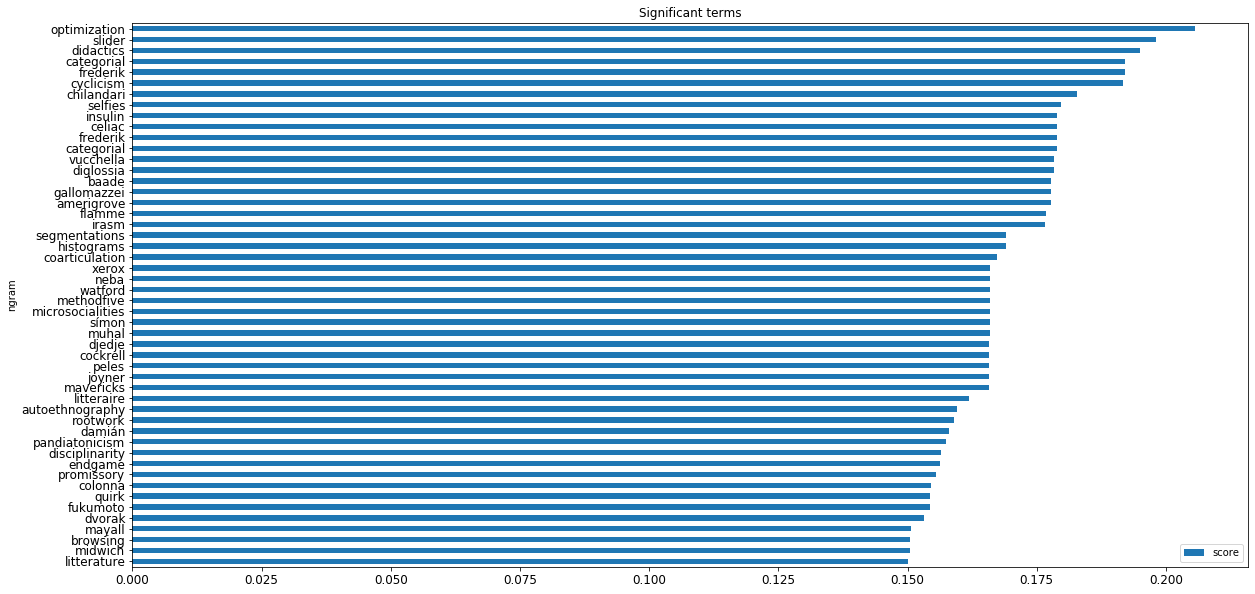

In [34]:
top_50.sort_values("score", ascending=True).plot.barh(title='Significant terms', figsize=(20, 10), fontsize=12, x="ngram", y="score");

 ### LDA topic modeling

In [ ]:
doc_count = len(id_list)
num_topics = 7 # Change the number of topics

# Remove terms that appear in less than 10% of documents and more than 75% of documents.
dictionary.filter_extremes(no_below=10 * .10, no_above=0.75)


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in documents]

In [ ]:
# Train the LDA model.
model = gensim.models.LdaModel(
    corpus=bow_corpus,
    id2word=dictionary,
    num_topics=num_topics
)

In [ ]:
for topic_num in range(0, num_topics):
    word_ids = model.get_topic_terms(topic_num)
    words = []
    for wid, weight in word_ids:
        word = dictionary.id2token[wid]
        words.append(word)
    print("Topic {}".format(str(topic_num).ljust(5)), " ".join(words))